In [1]:
# Import pyNBS modules
from pyNBS import data_import_tools as dit
from pyNBS import network_propagation as prop
from pyNBS import pyNBS_core as core
from pyNBS import pyNBS_single
from pyNBS import consensus_clustering as cc
from pyNBS import pyNBS_plotting as plot

# Import other needed packages
import os
import time
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
maf_path = './GBMmaf.txt'
sm_path = './GBM_sm_data.txt'
dit.process_TCGA_MAF(maf_path, './GBM_sm_data.txt', verbose = True)

Binary somatic mutation matrix saved
MAF file processed: ./GBMmaf.txt 6.21 seconds.


In [3]:
sm_mat = pd.read_csv(sm_path, index_col = 0).astype(int)
sm_mat

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1253,pk
TCGA-32-1970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-41-3392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-0649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-0128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-14-2554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-14-0862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-06-2569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-28-6450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-26-5132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
network_filepath = './Example_Data/Network_Files/HumanNet90_Symbol.txt'
network = dit.load_network_file(network_filepath)
len(network.nodes)

Network File Loaded: ./Example_Data/Network_Files/HumanNet90_Symbol.txt


7939

In [5]:
# knnGlap = core.network_inf_KNN_glap(network)
# knnGlap.to_csv('./knnGlap_HN90.csv')
knnGlap = pd.read_csv('./knnGlap_HN90.csv', index_col = 0)
knnGlap

,GTF2E1,GTF2A1,TAF4,TAF13,GTF2A2,GTF2E2,GTF2H4,GTF2H3,TAF12,TAF6,...,LRRFIP1,LRRFIP2,DPP7,ENPEP,SYT14,SYT16,FER,LTK,NKD1,NKD2
GTF2E1,12,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
GTF2A1,-1,11,-1,0,-1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAF4,-1,-1,14,-1,-1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
TAF13,-1,0,-1,13,-1,-1,0,0,-1,-1,...,0,0,0,0,0,0,0,0,0,0
GTF2A2,-1,-1,-1,-1,14,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYT16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,1,0,0,0,0
FER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-1,0,0
LTK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,1,0,0
NKD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1


In [6]:
alpha = 0.7
clusters = 3
niter = 100

# Optional: Setting the output directory for files to be saved in
outdir = './Results/HN90_GBM/'+'c'+str(clusters)+'_i'+str(niter)+'/'

# Optional: Creating above output directory if it doesn't already exist
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
# Optional: Setting a filename prefix for all files saved to outdir
job_name = 'HN90_c'+str(clusters)+'_i'+str(niter)

# Constructs dictionary to be passed as "save_args" to functions if output to be saved
save_args = {'outdir': outdir, 'job_name': job_name}

In [7]:
network_nodes = network.nodes()
network_I = pd.DataFrame(np.identity(len(network_nodes)), index=network_nodes, columns=network_nodes)

# kernel = prop.network_propagation(network, network_I, alpha=alpha, symmetric_norm=False)
# kernel.to_csv('./kernel_HN90.csv')
kernel = pd.read_csv('./kernel_HN90.csv', index_col = 0)
kernel

,GTF2E1,TAF9,TAF6,TAF4,TAF5,CFL2,HCLS1,CPSF3,WDR33,ATP7A,...,LRRFIP2,LRRFIP1,DPP7,ENPEP,SYT14,SYT16,FER,LTK,NKD1,NKD2
GTF2E1,0.306637,0.014976,0.013777,0.014002,0.014251,0.000010,0.000022,0.000784,0.000105,5.823783e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF9,0.007845,0.311847,0.011590,0.009116,0.011366,0.000011,0.000023,0.000483,0.000093,8.440327e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF6,0.009185,0.014751,0.311842,0.011710,0.015876,0.000014,0.000036,0.000427,0.000095,9.026563e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF4,0.016213,0.020151,0.020338,0.309458,0.020660,0.000011,0.000023,0.000495,0.000124,5.487274e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
TAF5,0.006270,0.009547,0.010478,0.007851,0.307778,0.000027,0.000029,0.000318,0.000060,1.239453e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADAMDEC1,0.000016,0.000040,0.000041,0.000014,0.000079,0.000006,0.000018,0.000024,0.000013,5.545053e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
ETHE1,0.000016,0.000039,0.000026,0.000013,0.000032,0.000021,0.000025,0.000020,0.000009,2.042856e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
NKD1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.588235,0.411765
NKD2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411765,0.588235


In [8]:
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(sm_mat, knnGlap, propNet=network, propNet_kernel=kernel, k=clusters))
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist.append(pyNBS_single.NBS_single(sm_mat, propNet=network, propNet_kernel=kernel, regNet_glap=knnGlap, 
    #                                      k=clusters, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print ('NBS iteration:', i+1, 'complete:', t, 'seconds')

/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 1 complete: 81.41716432571411 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 2 complete: 81.10414481163025 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 3 complete: 84.94734311103821 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 4 complete: 85.31872510910034 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 5 complete: 81.95476078987122 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 6 complete: 103.24759459495544 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 7 complete: 104.23416519165039 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 8 complete: 128.55327582359314 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 9 complete: 100.63833141326904 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 10 complete: 99.08717656135559 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 11 complete: 100.29901790618896 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 12 complete: 83.69510746002197 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 13 complete: 81.66964817047119 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 14 complete: 84.26462483406067 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 15 complete: 87.12982535362244 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 16 complete: 86.67301630973816 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 17 complete: 82.65361309051514 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 18 complete: 81.68041729927063 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 19 complete: 80.56946682929993 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 20 complete: 82.05780696868896 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 21 complete: 82.58333802223206 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 22 complete: 81.49326515197754 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 23 complete: 84.37851095199585 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 24 complete: 84.59637475013733 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 25 complete: 81.46881747245789 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 26 complete: 82.25867676734924 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 27 complete: 81.02457475662231 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 28 complete: 80.98716044425964 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 29 complete: 88.00342345237732 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 30 complete: 86.12271237373352 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 31 complete: 82.47472429275513 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 32 complete: 83.33081078529358 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 33 complete: 82.19335269927979 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 34 complete: 82.04763579368591 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 35 complete: 82.00562238693237 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 36 complete: 81.17204117774963 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 37 complete: 81.12676954269409 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 38 complete: 80.11080622673035 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 39 complete: 79.34746599197388 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 40 complete: 79.98827934265137 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 41 complete: 79.66355347633362 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 42 complete: 79.58954906463623 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 43 complete: 79.49214506149292 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 44 complete: 78.55402278900146 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 45 complete: 78.69249892234802 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 46 complete: 82.37788701057434 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 47 complete: 88.6288902759552 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 48 complete: 87.21056365966797 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 49 complete: 88.0863709449768 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 50 complete: 82.37075805664062 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 51 complete: 81.37409281730652 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 52 complete: 83.11799454689026 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 53 complete: 83.74221563339233 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 54 complete: 84.15629053115845 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 55 complete: 81.53402400016785 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 56 complete: 81.70300197601318 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 57 complete: 82.5817654132843 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 58 complete: 81.86911630630493 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 59 complete: 81.57255935668945 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 60 complete: 81.04432582855225 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 61 complete: 81.2187762260437 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 62 complete: 80.90100002288818 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 63 complete: 78.84166669845581 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 64 complete: 78.44162702560425 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 65 complete: 78.8157651424408 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 66 complete: 79.5253255367279 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 67 complete: 77.94669699668884 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 68 complete: 78.08130359649658 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 69 complete: 78.00598001480103 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 70 complete: 78.00161218643188 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 71 complete: 77.96765518188477 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 72 complete: 78.16942381858826 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 73 complete: 77.91397905349731 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 74 complete: 77.3556079864502 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 75 complete: 80.51691555976868 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 76 complete: 81.27428340911865 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 77 complete: 81.50056409835815 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 78 complete: 81.45697784423828 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 79 complete: 83.96815013885498 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 80 complete: 83.4964759349823 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 81 complete: 81.81912779808044 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 82 complete: 81.9794294834137 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 83 complete: 80.66025352478027 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 84 complete: 79.75711369514465 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 85 complete: 84.77413296699524 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 86 complete: 84.55454182624817 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 87 complete: 83.30605220794678 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 88 complete: 85.19054412841797 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 89 complete: 87.78515815734863 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 90 complete: 82.27196383476257 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 91 complete: 80.7276611328125 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 92 complete: 79.91885495185852 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 93 complete: 78.75497841835022 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 94 complete: 78.50162887573242 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 95 complete: 78.53175497055054 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 96 complete: 78.2005705833435 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 97 complete: 77.975332736969 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 98 complete: 78.16844964027405 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 99 complete: 77.63903737068176 seconds


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_core.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W_init = np.linalg.lstsq(H.T, data.T)[0].T


NBS iteration: 100 complete: 76.89876317977905 seconds


In [9]:
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters, **save_args)

Constructing Hlist: 100 cluster matrices,  389 samples
Hlist consensus constructed and sample clusters assigned


In [10]:
# Assign colors to clusters from pyNBS
pyNBS_GBM_clust_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='GBM Cluster Assignments')

# Plot and save co-cluster map figure
plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, col_color_map=pyNBS_GBM_clust_cmap, **save_args)

Co-Clustering Map plotted


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_plotting.py:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


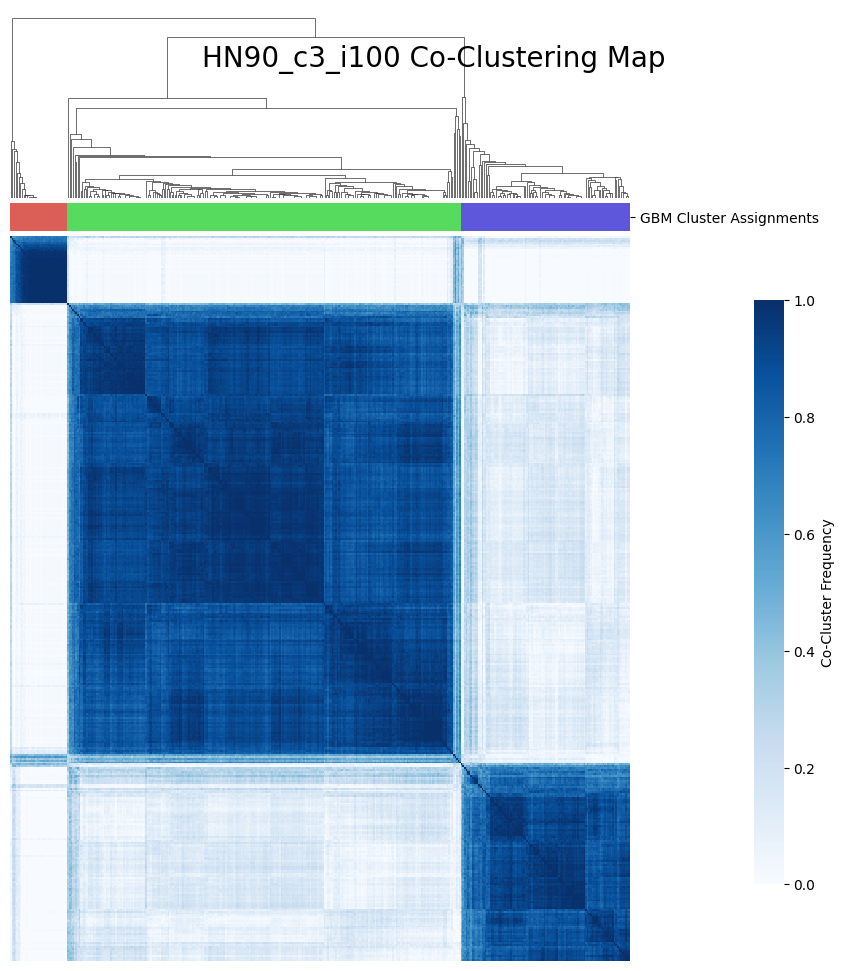

In [11]:
Image(filename = save_args['outdir']+save_args['job_name']+'_cc_map.png', width=600, height=600)

In [12]:
gbm_clinical_path = './gbm_clinical.csv'
gbm_clinical = pd.read_csv(gbm_clinical_path, index_col = 0)
gbm_clinical = gbm_clinical[['submitter_id','vital_status','days_to_death','days_to_last_follow_up']]
gbm_clinical = gbm_clinical.replace({'Dead': 1, 'Alive' : 0, 'Not Reported': 0}).fillna(0)
gbm_clinical['overall_survival'] = [ max(i,j) for i,j in 
                                    zip(gbm_clinical['days_to_death'],gbm_clinical['days_to_last_follow_up'])]
gbm_clinical.to_csv('./survival_GBM.csv', index = False)

Multi-Class Log-Rank P: 0.23196360664203783
Kaplan Meier Plot constructed


/home/mihir/.local/lib/python3.8/site-packages/pyNBS/pyNBS_plotting.py:107: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


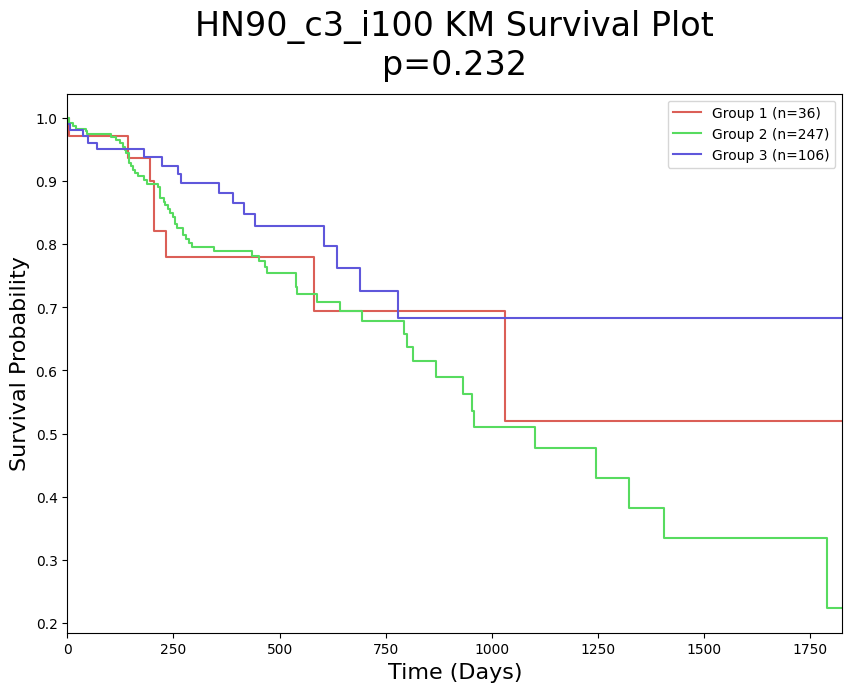

In [13]:
# Load survival Data
surv_data = './survival_GBM.csv'

# Plot KM Plot for patient clusters
plot.cluster_KMplot(NBS_cluster_assign, surv_data, delimiter=',', **save_args)
Image(filename = save_args['outdir']+save_args['job_name']+'_KM_plot.png', width=600, height=600)